In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


In [218]:
import datetime as dt

In [219]:
st.title("Gold Price Forecasting")
df = pd.read_csv("Gold_data.csv")


In [220]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [221]:
df['price'].skew()

0.6373117447689824

In [222]:
df['price'].kurt()

-1.2431585470188062

In [223]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


<AxesSubplot:xlabel='price', ylabel='Count'>

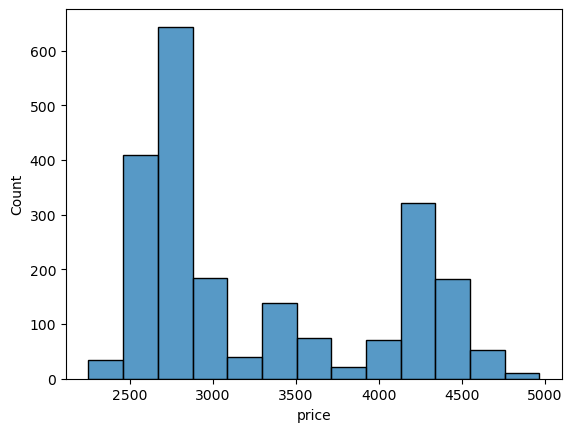

In [224]:
sns.histplot(df['price'])

In [225]:
len(df)

2182

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [227]:
df.shape

(2182, 2)

In [228]:
df['date'] = pd.to_datetime(df['date'])

In [229]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [230]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [231]:
df.duplicated().sum()

0

In [232]:
df['price'].max()

4966.3

In [233]:
df['price'].min()

2252.6

In [234]:
df['price'].value_counts().head(15)

2598.7    4
2892.7    4
2731.8    3
2695.2    3
2768.7    3
3372.2    3
2870.4    3
3596.1    3
2860.4    3
4579.2    3
2731.7    3
2869.0    3
2849.0    3
2859.5    3
2819.3    3
Name: price, dtype: int64

<AxesSubplot:xlabel='price'>

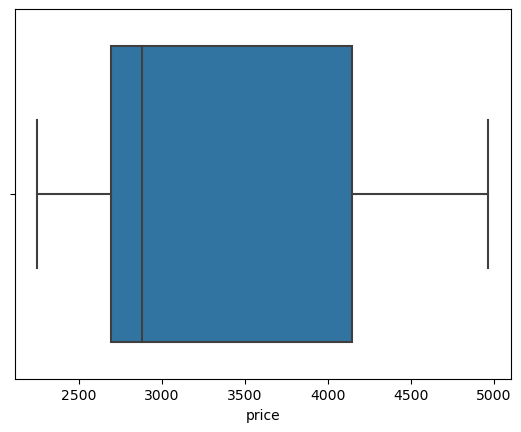

In [235]:
sns.boxplot(x =df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

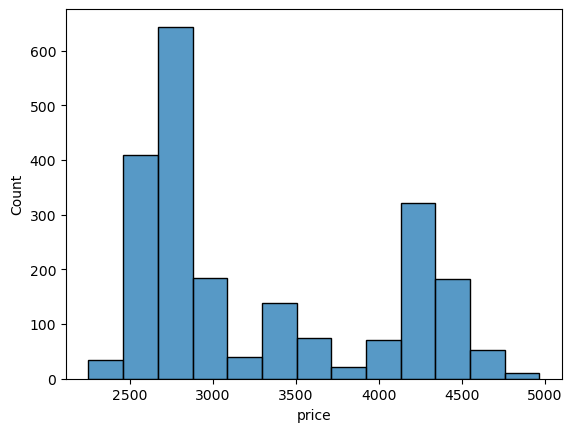

In [236]:
sns.histplot(df['price'])

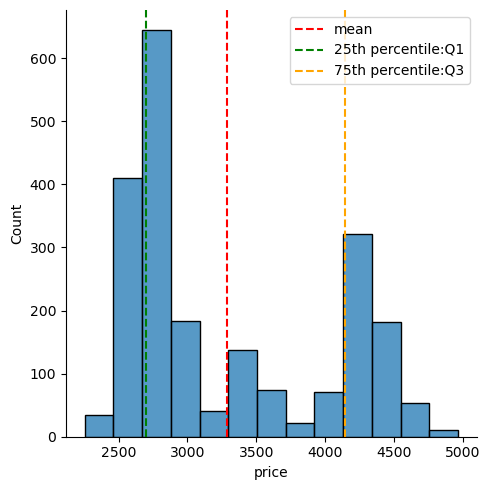

In [237]:
sns.displot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [238]:
df['year'] = df['date'].dt.year

In [239]:
df['month'] = df['date'].dt.month

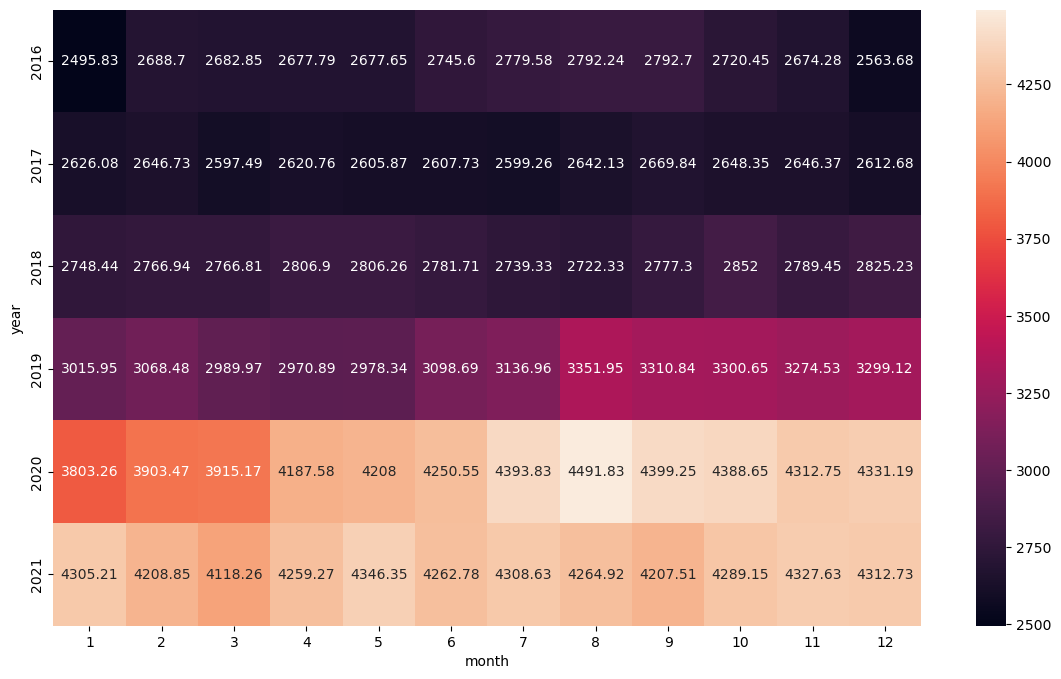

In [240]:
plt.figure(figsize=(14,8))
heatmap = pd.pivot_table(data=df,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

In [241]:
df.set_index(['date'],inplace=True)

In [242]:
df

,price,year,month
date,,,
2016-01-01,2252.60,2016,1
2016-01-02,2454.50,2016,1
2016-01-03,2708.10,2016,1
2016-01-04,2577.80,2016,1
2016-01-05,2597.75,2016,1
...,...,...,...
2021-12-17,4394.40,2021,12
2021-12-18,4389.50,2021,12
2021-12-19,4389.50,2021,12


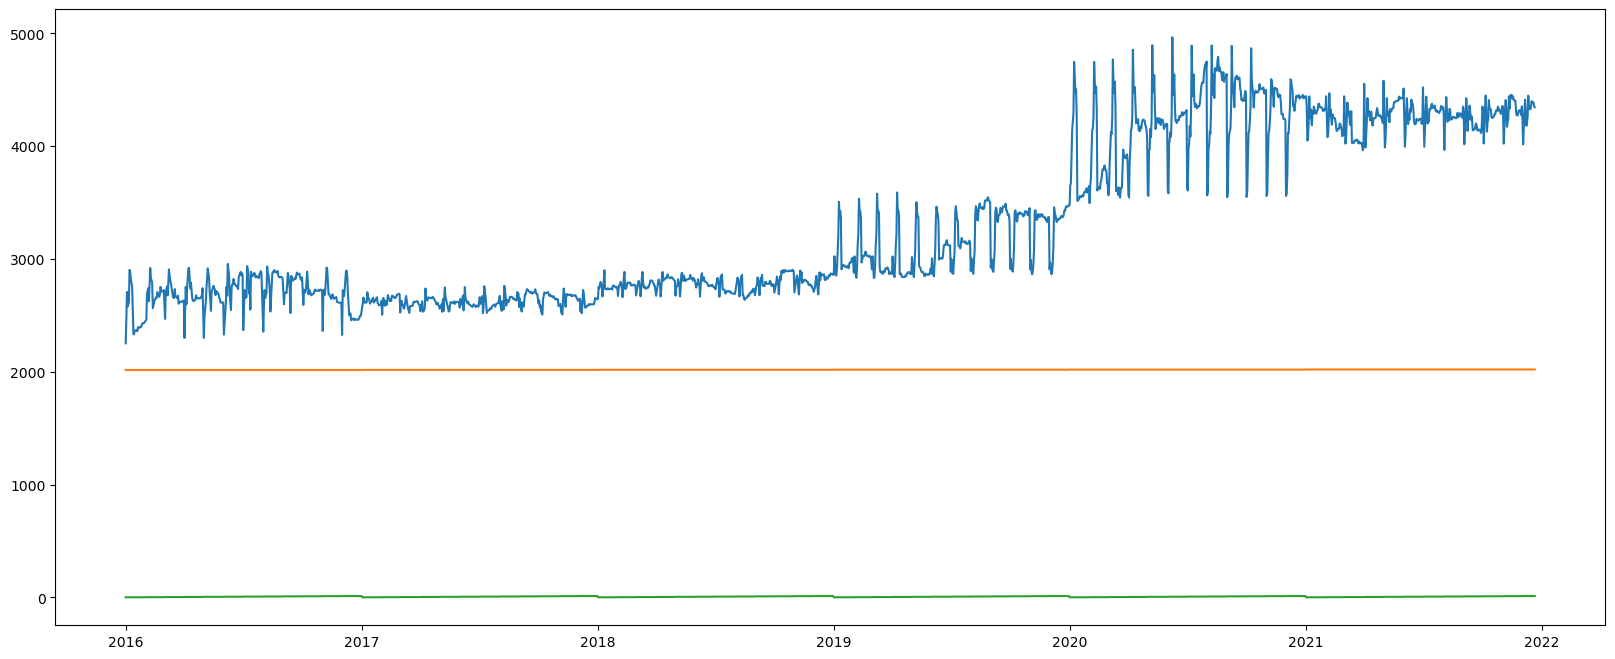

In [243]:
plt.figure(figsize=(20,8))
plt.plot(df)

In [244]:
df.reset_index(level =['date'], inplace = True)


In [245]:
df['year'] = df['date'].dt.year

In [246]:
df.head()

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1


In [247]:
df.groupby(['year'])['price'].sum()/365

year
2016    2697.985708
2017    2626.676484
2018    2781.938082
2019    3150.210685
2020    4227.930411
2021    4149.970959
Name: price, dtype: float64

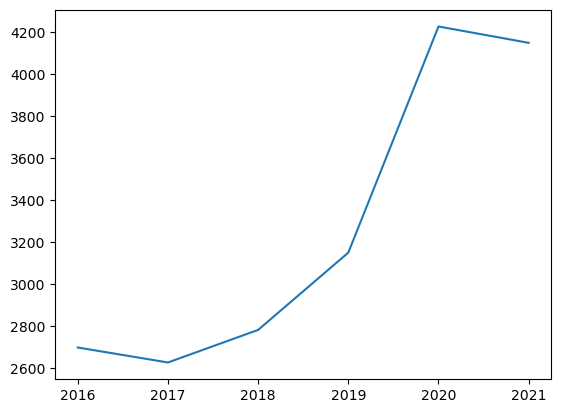

In [248]:
plt.plot(df.groupby(['year'])['price'].sum()/365)

<AxesSubplot:>

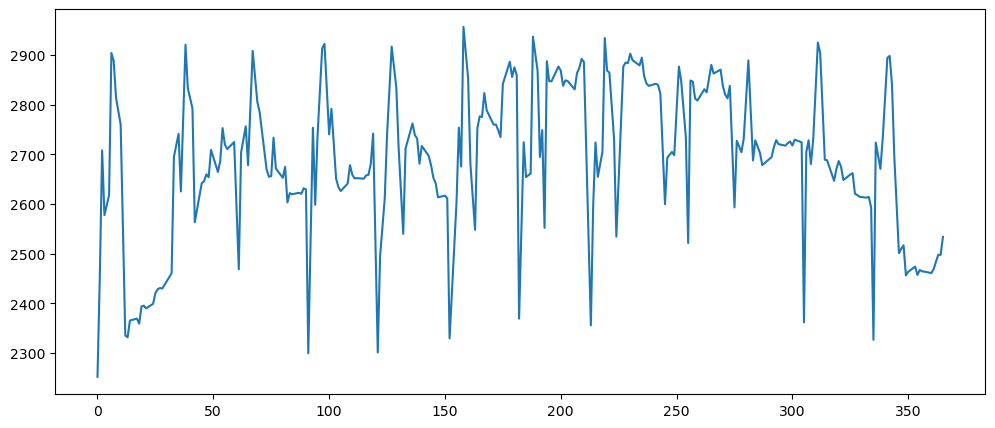

In [249]:
df.loc[df['year']==2016]['price'].plot(figsize=(12,5))

<AxesSubplot:>

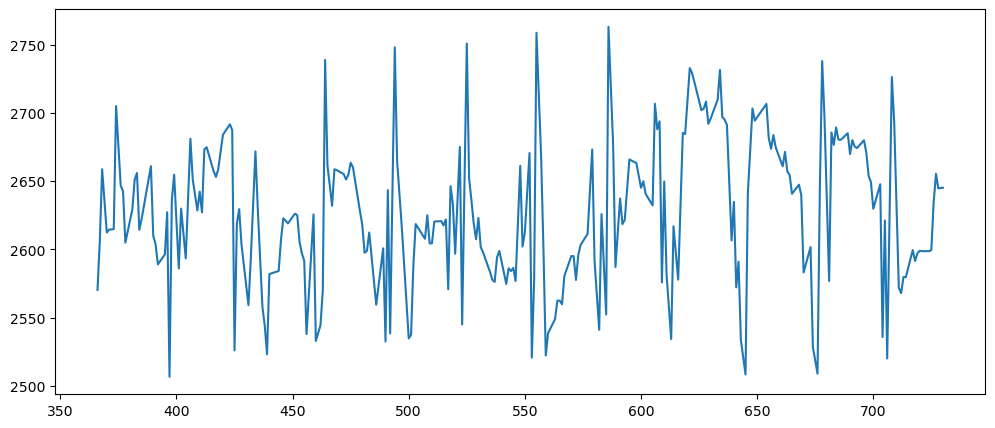

In [250]:
df.loc[df['year']==2017]['price'].plot(figsize=(12,5))

<AxesSubplot:>

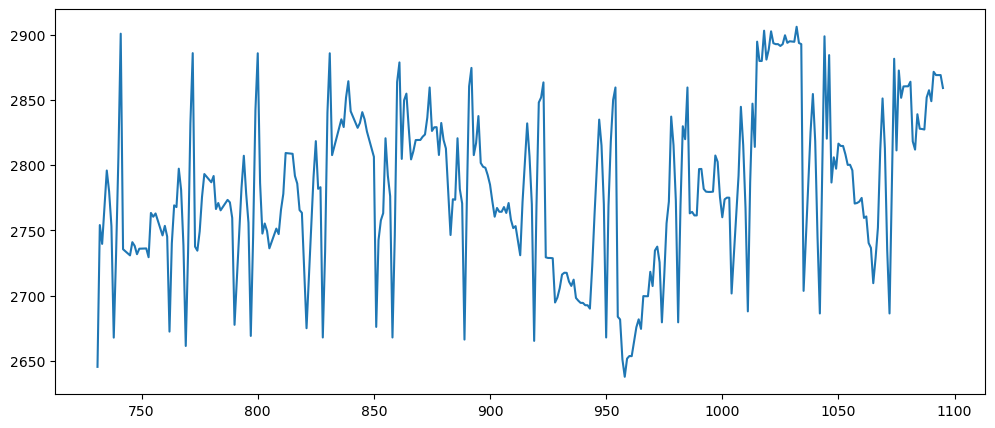

In [251]:
df.loc[df['year']==2018]['price'].plot(figsize=(12,5))

<AxesSubplot:>

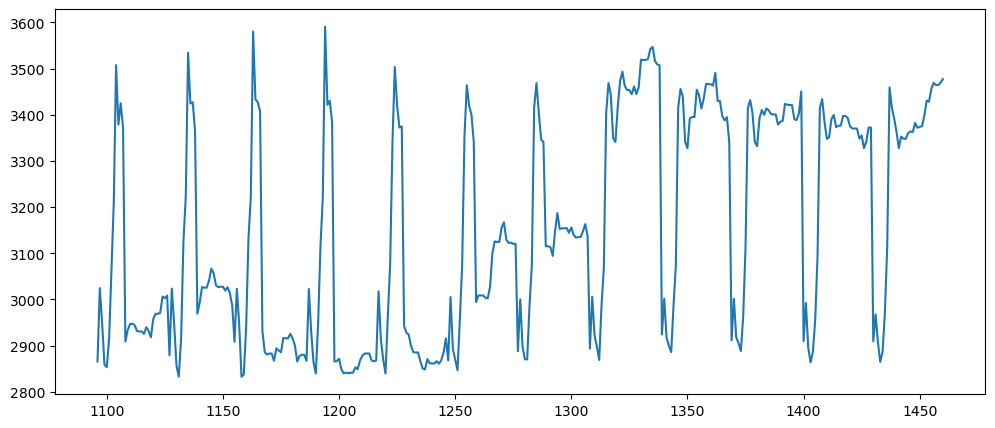

In [252]:
df.loc[df['year']==2019]['price'].plot(figsize=(12,5))

<AxesSubplot:>

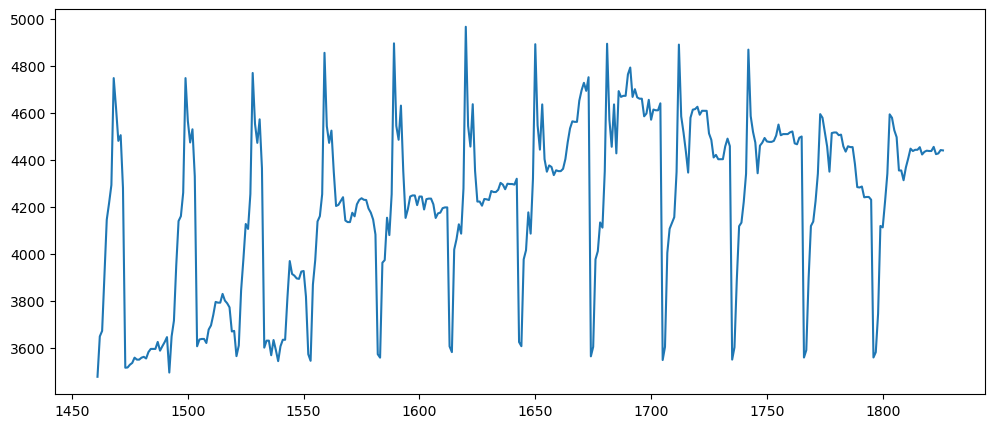

In [253]:
df.loc[df['year']==2020]['price'].plot(figsize=(12,5))

<AxesSubplot:>

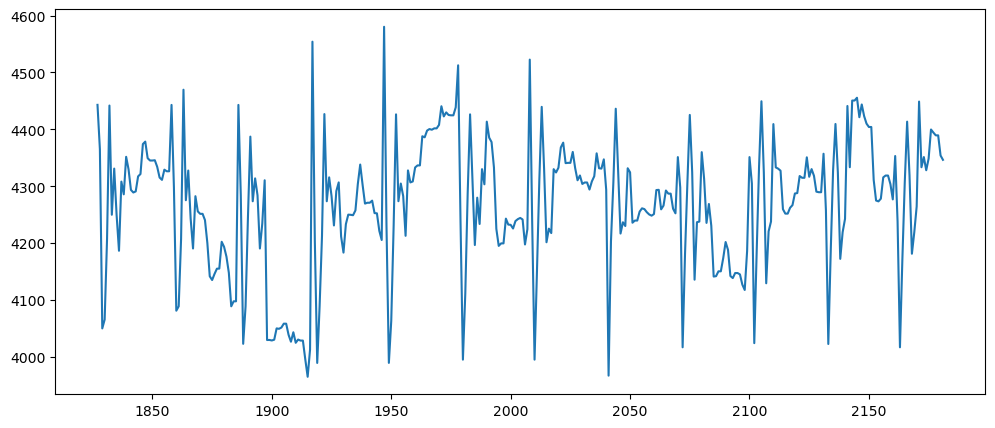

In [254]:
df.loc[df['year']==2021]['price'].plot(figsize=(12,5))

Text(0.5, 1.0, 'Rolling Mean')

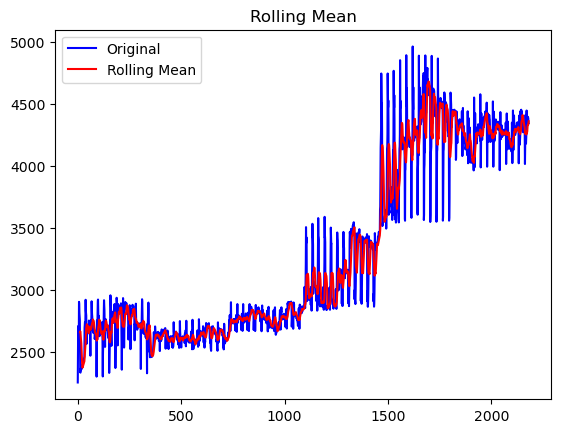

In [255]:
rolmean = df.price.rolling(12).mean()
orig = plt.plot(df.price, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

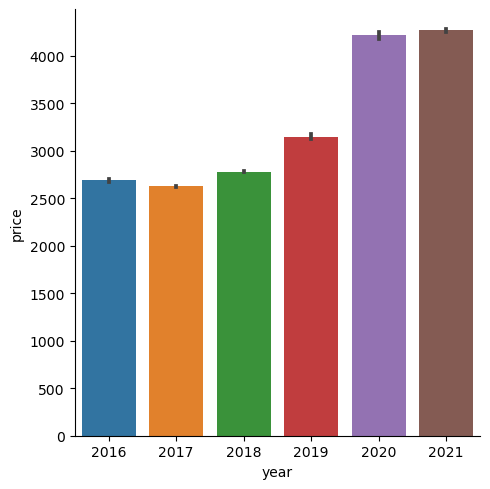

In [256]:
sns.catplot(x='year',y='price',data=df,kind='bar')

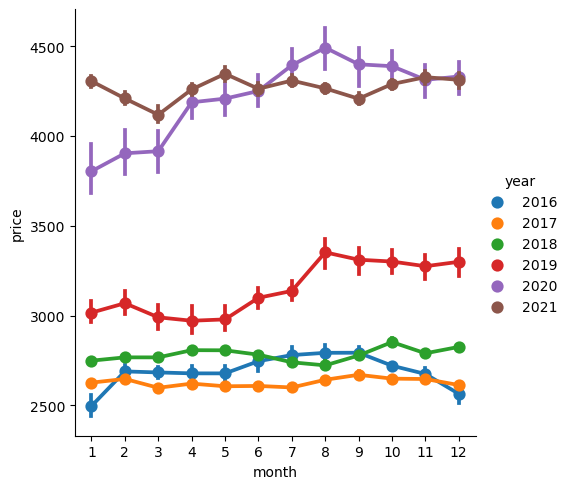

In [257]:
sns.catplot(data = df, x ="month", y = "price", hue = "year",kind='point')

<AxesSubplot:xlabel='year', ylabel='price'>

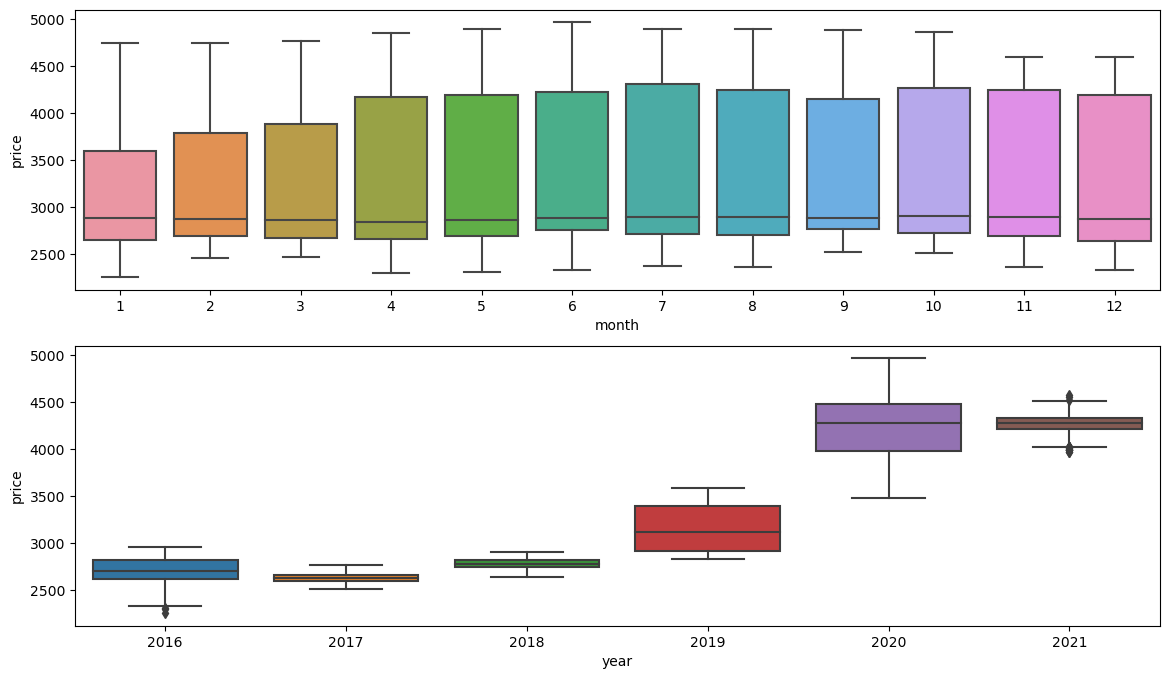

In [258]:
#Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="price", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="price", data=df)


In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose

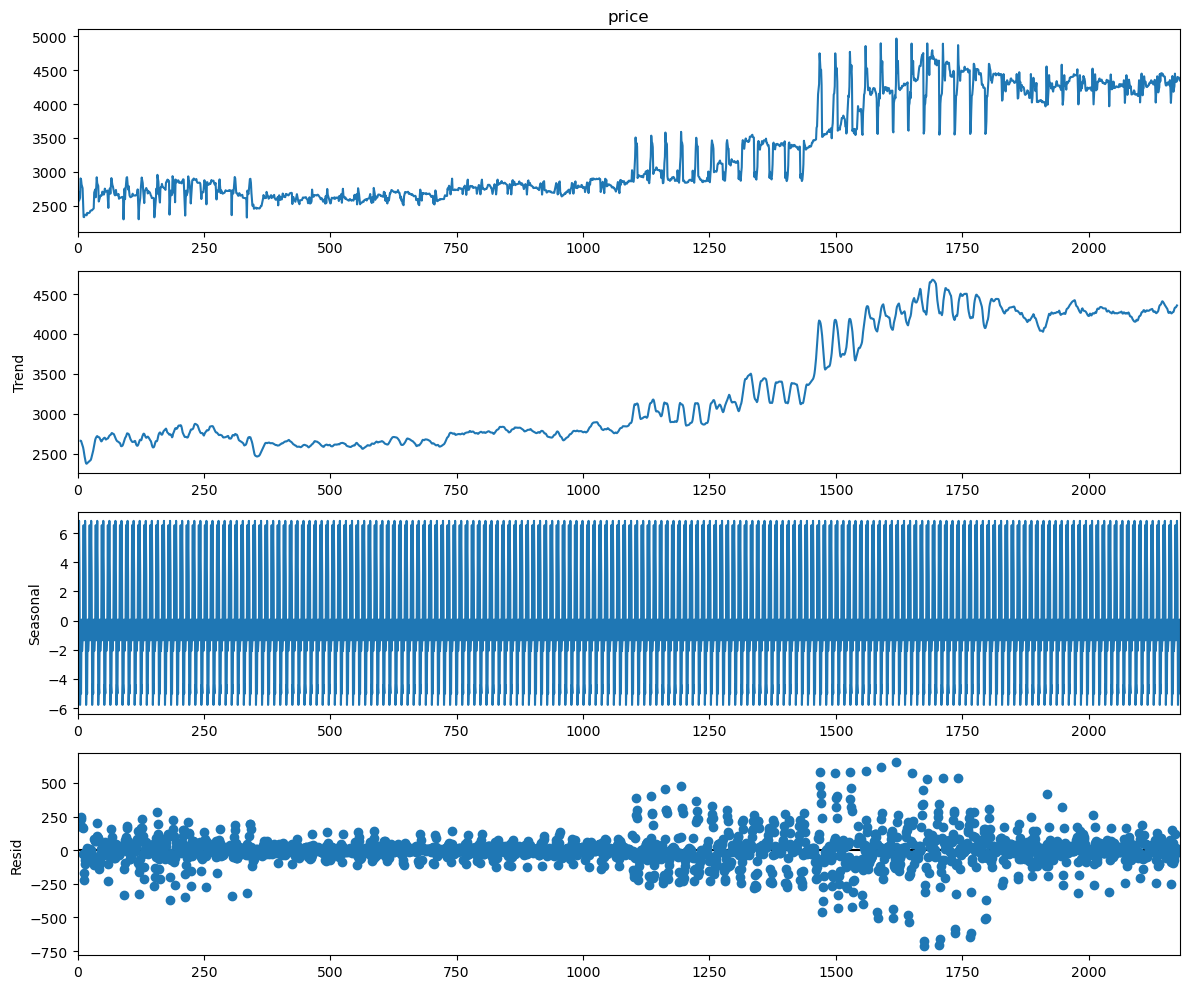

In [260]:
decompose_ts_add = seasonal_decompose(df.price, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    

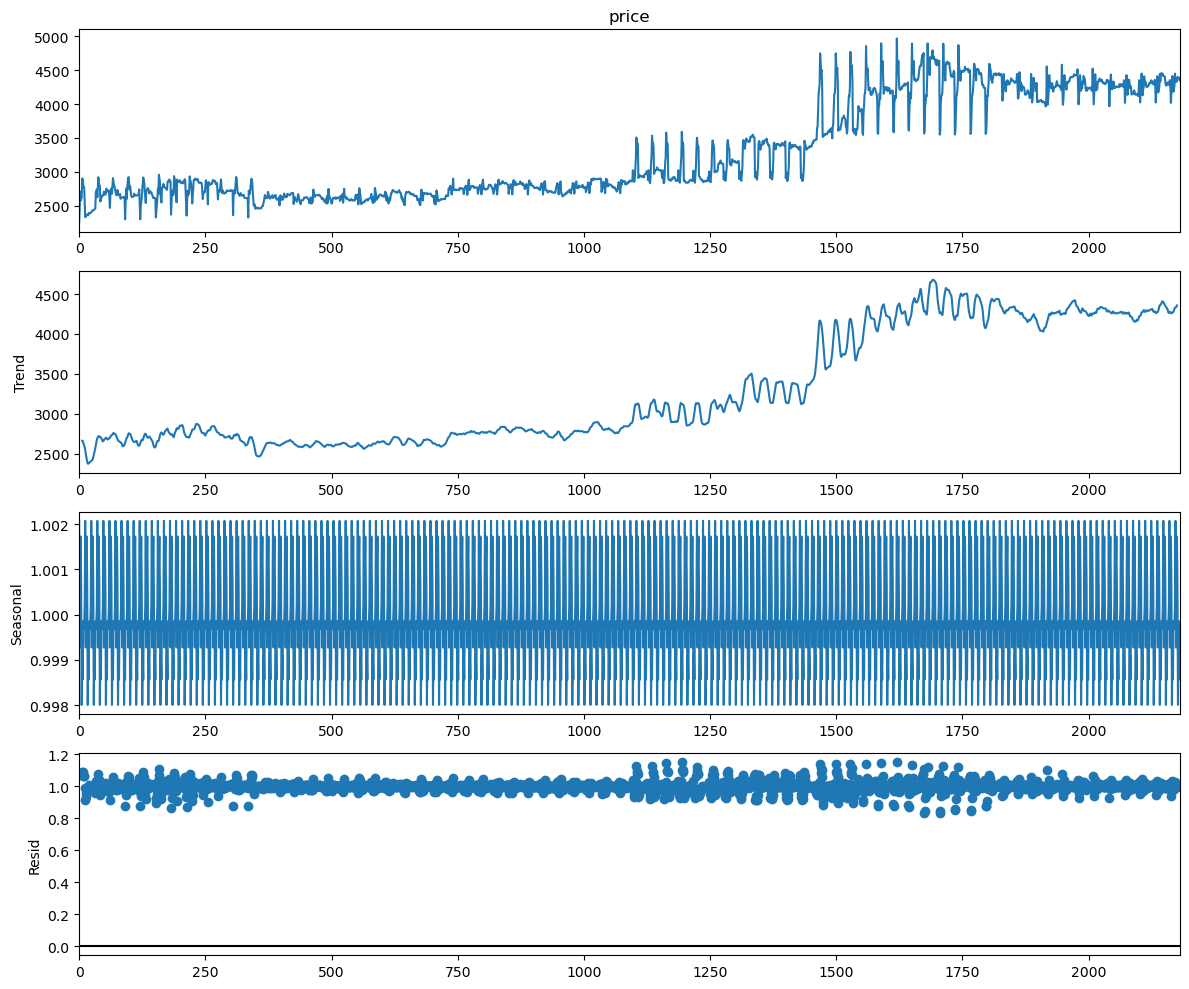

In [261]:
decompose_ts_add = seasonal_decompose(df.price, period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    

In [262]:
from statsmodels.tsa.stattools import adfuller

In [263]:
def adf_test(series):
    result=adfuller(series,autolag='AIC')
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [264]:
adf_test(df['price'])

ADF Statistics: -0.3099036570504781
p- value: 0.9240899189079186
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [265]:
## Use Techniques Differencing
df['price First Difference']=df['price']-df['price'].shift(1)

In [266]:
adf_test(df['price First Difference'].dropna())

ADF Statistics: -21.664542127246374
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [267]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series):
    print ('Results of KPSS Test:')
    kpsstest = kpss(series, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    
    print (kpss_output)

In [268]:
kpss_test(df['price'])

Results of KPSS Test:
Test Statistic     6.729272
p-value            0.010000
#Lags Used        28.000000
dtype: float64


In [269]:
kpss_test(df['price First Difference'].dropna())

Results of KPSS Test:
Test Statistic     0.017761
p-value            0.100000
#Lags Used        22.000000
dtype: float64


In [270]:
#ACF and PACF

In [271]:
import statsmodels.graphics.tsaplots as tsa_plots

In [272]:
df.head()

,date,price,year,month,price First Difference
0,2016-01-01,2252.60,2016,1,NaN
1,2016-01-02,2454.50,2016,1,201.90
2,2016-01-03,2708.10,2016,1,253.60
3,2016-01-04,2577.80,2016,1,-130.30
4,2016-01-05,2597.75,2016,1,19.95


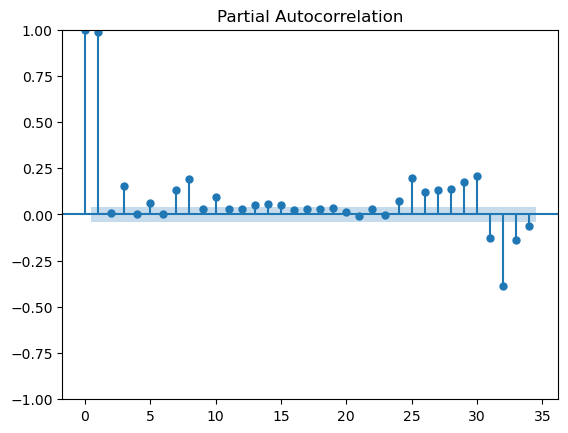

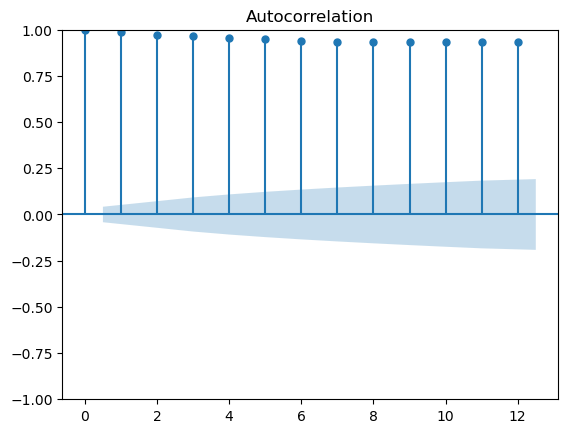

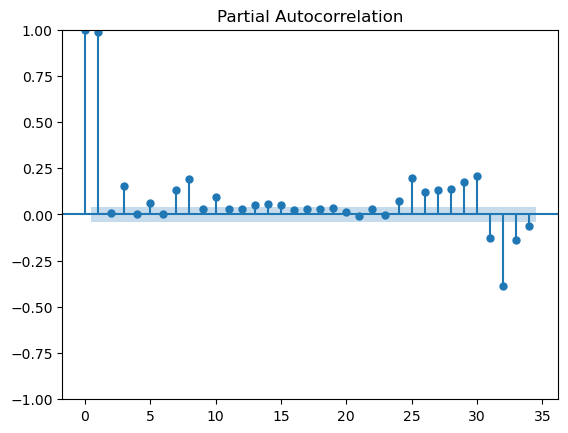

In [273]:
tsa_plots.plot_acf(df['price'],lags=12)
tsa_plots.plot_pacf(df.price)

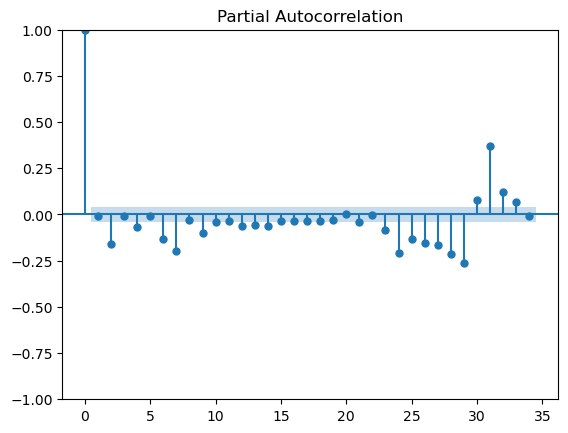

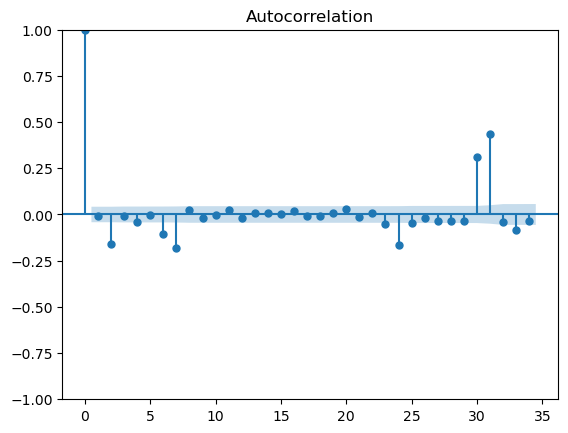

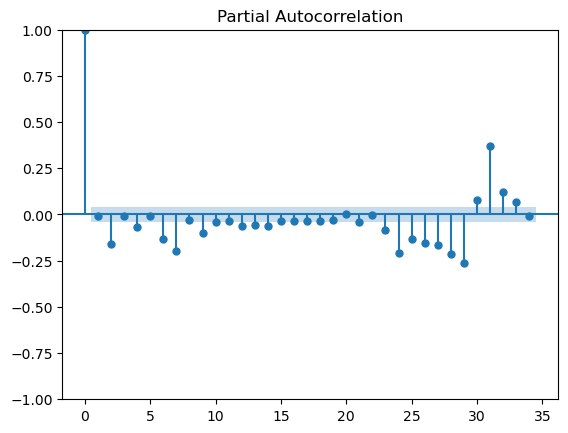

In [274]:
tsa_plots.plot_acf(df['price First Difference'].dropna())
tsa_plots.plot_pacf(df['price First Difference'].dropna())

In [275]:
import statsmodels.formula.api as smf 

In [276]:
df["t"] = np.arange(1,2183)

df["t_squared"] = df["t"]*df["t"]

df["log_price"] = np.log(df["price"])

In [277]:
import calendar

In [278]:
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [279]:
month_dummies = pd.get_dummies(df['month'])
df = pd.concat([df,month_dummies],axis=1)

In [280]:
Train = df.head(2152)
Test = df.tail(30)

In [281]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

# data driven

In [282]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [283]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train.price).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price)

2.353934131154247

In [284]:
# Holt method 
hw_model = Holt(Train.price).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price)

3.159214564329312

In [285]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price)

2.2530315379369363

In [286]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train.price,seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

2.847518055111765

In [287]:
hwe_model_add_add.forecast(12)

2152    4389.465215
2153    4374.027831
2154    4372.344310
2155    4391.930435
2156    4401.202086
2157    4395.819492
2158    4394.163604
2159    4385.241690
2160    4401.826147
2161    4398.468030
2162    4398.626730
2163    4411.251904
dtype: float64

In [288]:
pred_hwe_add_add

2152    4389.465215
2153    4374.027831
2154    4372.344310
2155    4391.930435
2156    4401.202086
2157    4395.819492
2158    4394.163604
2159    4385.241690
2160    4401.826147
2161    4398.468030
2162    4398.626730
2163    4411.251904
2164    4395.812276
2165    4380.261047
2166    4378.465722
2167    4397.942049
2168    4407.105872
2169    4401.617383
2170    4399.857500
2171    4390.833456
2172    4407.317615
2173    4403.860999
2174    4403.922967
2175    4416.453143
2176    4400.920223
2177    4385.277374
2178    4383.392072
2179    4402.780037
2180    4411.857082
2181    4406.283372
dtype: float64

# model based

In [289]:
#linear model
linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear


103.15443682194355

In [290]:
#Exponential
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

144.41640747448696

In [291]:
#Quadratic 

Quad = smf.ols('price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

533.9441755135559

In [292]:
#Additive seasonality 

add_sea = smf.ols('price~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1139.3462879731956

In [293]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

452.65306755256796

In [294]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_price~January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1206.4516308510765

In [295]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_price~t+January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

96.56019231165361

In [296]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,103.154437
1,rmse_Exp,144.416407
2,rmse_Quad,533.944176
3,rmse_add_sea,1139.346288
4,rmse_add_sea_quad,452.653068
5,rmse_Mult_sea,1206.451631
6,rmse_Mult_add_sea,96.560192


In [297]:
pred_linear

2152    4357.831116
2153    4358.841474
2154    4359.851831
2155    4360.862189
2156    4361.872546
2157    4362.882904
2158    4363.893261
2159    4364.903619
2160    4365.913976
2161    4366.924333
2162    4367.934691
2163    4368.945048
2164    4369.955406
2165    4370.965763
2166    4371.976121
2167    4372.986478
2168    4373.996836
2169    4375.007193
2170    4376.017551
2171    4377.027908
2172    4378.038265
2173    4379.048623
2174    4380.058980
2175    4381.069338
2176    4382.079695
2177    4383.090053
2178    4384.100410
2179    4385.110768
2180    4386.121125
2181    4387.131482
dtype: float64

In [298]:
pred_Mult_add_sea

2152    8.365784
2153    8.366084
2154    8.366385
2155    8.366685
2156    8.366985
2157    8.367286
2158    8.367586
2159    8.367886
2160    8.368187
2161    8.351187
2162    8.351488
2163    8.351788
2164    8.352088
2165    8.352389
2166    8.352689
2167    8.352989
2168    8.353290
2169    8.353590
2170    8.353890
2171    8.354190
2172    8.354491
2173    8.354791
2174    8.355091
2175    8.355392
2176    8.355692
2177    8.355992
2178    8.356293
2179    8.356593
2180    8.356893
2181    8.357194
dtype: float64

In [299]:
train_1=df.head(2152)
test_1=df.tail(30)

In [300]:
!pip install pmdarima

In [301]:
# Import the library
from pmdarima import auto_arima

In [302]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to Gold Price dataset
stepwise_fit = auto_arima(train_1['price'],start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=29690.413, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=27204.061, Time=1.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=27279.211, Time=1.95 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=29691.734, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=27639.096, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=26882.192, Time=3.63 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=28950.289, Time=6.00 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=26832.784, Time=4.83 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=27165.250, Time=2.06 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.43 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.98 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

In [303]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2152
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood              -13395.309
Date:                             Wed, 26 Jul 2023   AIC                          26804.617
Time:                                     13:08:00   BIC                          26844.297
Sample:                                          0   HQIC                         26819.137
                                            - 2152                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2051      1.015      2.172      0.030       0.215       4.195
ar.L1          1.5621      0.052     29.971      0.000       1.460       1.664
ar.L2         -0.6648      0.037    -17.904      0.000      -0.738      -0.592
ma.L1         -0.6895      0.061    -11.343      0.000      -0.809      -0.570
ar.S.L12      -0.6167      0.012    -50.385      0.000      -0.641      -0.593
ar.S.L24      -0.3796      0.011    -33.642      0.000      -0.402      -0.358
sigma2      1.595e+04    195.702     81.498      0.000    1.56e+04    1.63e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):             27959.63
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               4.89   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
prediction = pd.DataFrame(stepwise_fit.predict(n_periods = 30),index=test_1.index,columns=['price'])
#prediction.index = test_1.date

In [305]:
prediction

,price
2152,4369.622359
2153,4415.435666
2154,4347.603404
2155,4394.548891
2156,4356.155135
2157,4304.516211
2158,4324.082388
2159,4366.324560
2160,4393.339905
2161,4358.459520


In [306]:
prediction.index = test_1.date

In [307]:
MAPE(prediction.price,test_1.price)

nan

In [308]:
df.set_index('date',inplace=True)

In [309]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to Gold Price dataset
stepwise_fit_1 = auto_arima(df['price'],start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.28 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=30087.384, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=27570.060, Time=1.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=27640.623, Time=2.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=30088.517, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=28013.885, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=27243.538, Time=3.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.69 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=29332.626, Time=6.73 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=27193.401, Time=9.02 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=27530.619, Time=2.45 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.11 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.90 sec
 ARIMA(3,0,0)(2,1,0)[12] intercep

In [310]:
stepwise_fit_1.predict(200)

2021-12-22    4345.777772
2021-12-23    4419.057124
2021-12-24    4360.812598
2021-12-25    4382.291490
2021-12-26    4346.116099
                 ...     
2022-07-05    4542.996307
2022-07-06    4495.688335
2022-07-07    4438.775761
2022-07-08    4495.264624
2022-07-09    4528.501207
Freq: D, Length: 200, dtype: float64

In [311]:
prediction_2 = pd.Series(stepwise_fit_1.predict(30))
prediction_2

2021-12-22    4345.777772
2021-12-23    4419.057124
2021-12-24    4360.812598
2021-12-25    4382.291490
2021-12-26    4346.116099
2021-12-27    4303.997420
2021-12-28    4327.248182
2021-12-29    4345.814922
2021-12-30    4370.889222
2021-12-31    4351.630447
2022-01-01    4320.361928
2022-01-02    4328.174762
2022-01-03    4338.854852
2022-01-04    4404.963478
2022-01-05    4344.833498
2022-01-06    4385.970553
2022-01-07    4322.630915
2022-01-08    4227.224337
2022-01-09    4306.234493
2022-01-10    4363.151883
2022-01-11    4412.478887
2022-01-12    4369.263442
2022-01-13    4296.484277
2022-01-14    4312.038291
2022-01-15    4333.157277
2022-01-16    4445.826362
2022-01-17    4365.192322
2022-01-18    4392.862827
2022-01-19    4351.253401
2022-01-20    4312.551173
Freq: D, dtype: float64

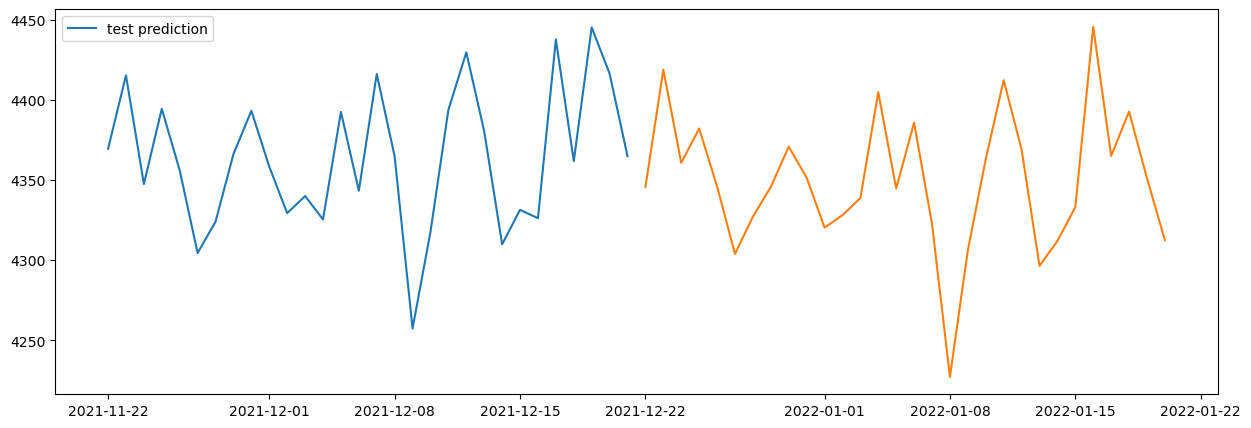

In [312]:
plt.figure(figsize=(15,5))
plt.plot(prediction,label='test prediction')
plt.plot(prediction_2) 
plt.legend()

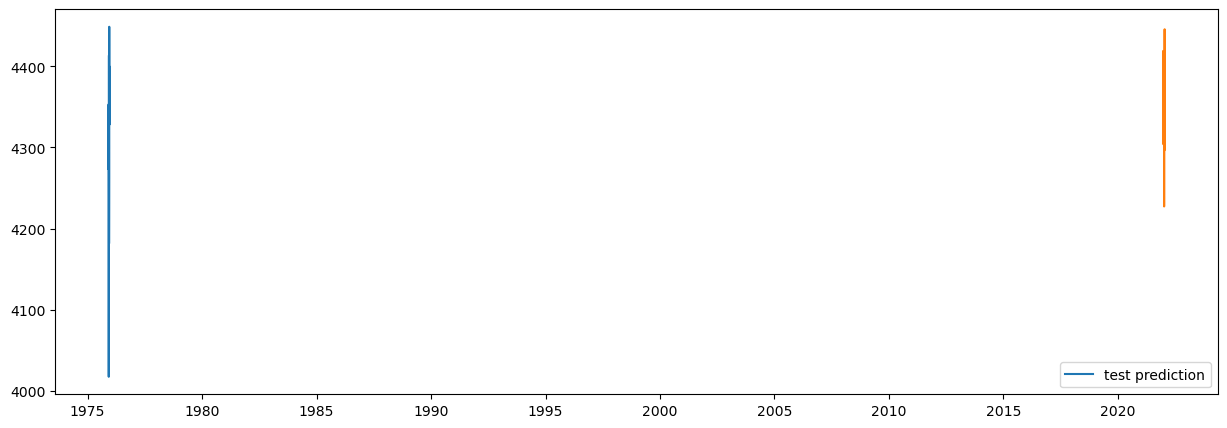

In [313]:
plt.figure(figsize=(15,5))
plt.plot(test_1.price,label='test prediction')
plt.plot(prediction_2)
plt.legend()

In [314]:
from sklearn.metrics import mean_squared_error
rmse_auto=np.sqrt(mean_squared_error(test_1.price,prediction))
rmse_auto

97.84153860719786

In [315]:
rmse_auto=np.sqrt(mean_squared_error(test_1.price,prediction_2))
rmse_auto

91.27882440906137

In [316]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
arima_model = ARIMA(df.price, order=(2, 0, 1))
arima_model_fit = arima_model.fit()

In [317]:
predication_3=arima_model_fit.predict()

In [322]:
import pickle
from pickle import dump
from pickle import load


In [323]:
pickle.dump(hwe_model_add_add,open('D:/code/hwe.pkl','wb'))

In [325]:
model=load(open('D:/code/hwe.pkl','rb'))

In [326]:
model.forecast(30)

2152    4389.465215
2153    4374.027831
2154    4372.344310
2155    4391.930435
2156    4401.202086
2157    4395.819492
2158    4394.163604
2159    4385.241690
2160    4401.826147
2161    4398.468030
2162    4398.626730
2163    4411.251904
2164    4395.812276
2165    4380.261047
2166    4378.465722
2167    4397.942049
2168    4407.105872
2169    4401.617383
2170    4399.857500
2171    4390.833456
2172    4407.317615
2173    4403.860999
2174    4403.922967
2175    4416.453143
2176    4400.920223
2177    4385.277374
2178    4383.392072
2179    4402.780037
2180    4411.857082
2181    4406.283372
dtype: float64

In [332]:
hwe_model_add_add = ExponentialSmoothing(df.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()


In [331]:
hwe_model_add_add.forecast(30)

2021-12-22    4346.731245
2021-12-23    4340.285356
2021-12-24    4350.025150
2021-12-25    4350.246807
2021-12-26    4343.039331
2021-12-27    4350.624365
2021-12-28    4340.027675
2021-12-29    4323.080131
2021-12-30    4320.853110
2021-12-31    4338.303509
2022-01-01    4349.216951
2022-01-02    4350.154283
2022-01-03    4349.882691
2022-01-04    4343.405399
2022-01-05    4353.114104
2022-01-06    4353.304980
2022-01-07    4346.067032
2022-01-08    4353.621896
2022-01-09    4342.995337
2022-01-10    4326.018222
2022-01-11    4323.761924
2022-01-12    4341.183338
2022-01-13    4352.068084
2022-01-14    4352.977006
2022-01-15    4352.677286
2022-01-16    4346.172148
2022-01-17    4355.853283
2022-01-18    4356.016866
2022-01-19    4348.751894
2022-01-20    4356.280005
Freq: D, dtype: float64